# 1. Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import pickle
from scipy.stats import zscore
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.set_index('Date',inplace=True)

In [5]:
data.shape

(8425, 22)

# DATA PRE PROCESSING

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(6752, 22)

we have 6752 row's of data which has 22 feature's and 1 label

In [8]:
data.isna().sum()

Location            0
MinTemp            60
MaxTemp            47
Rainfall          130
Evaporation      2911
Sunshine         3226
WindGustDir       932
WindGustSpeed     932
WindDir9am        784
WindDir3pm        284
WindSpeed9am       53
WindSpeed3pm       90
Humidity9am        44
Humidity3pm        86
Pressure9am      1298
Pressure3pm      1301
Cloud9am         1856
Cloud3pm         1892
Temp9am            41
Temp3pm            82
RainToday         130
RainTomorrow      130
dtype: int64

 we have missing values

Evaporation,sunshine have too many null values so we can drop them

In [9]:
data.drop(['Evaporation','Sunshine'],axis=1,inplace=True)

also dropping location column

In [10]:
data.drop('Location',axis=1,inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6752 entries, 2008-12-01 to 2017-06-25
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        6692 non-null   float64
 1   MaxTemp        6705 non-null   float64
 2   Rainfall       6622 non-null   float64
 3   WindGustDir    5820 non-null   object 
 4   WindGustSpeed  5820 non-null   float64
 5   WindDir9am     5968 non-null   object 
 6   WindDir3pm     6468 non-null   object 
 7   WindSpeed9am   6699 non-null   float64
 8   WindSpeed3pm   6662 non-null   float64
 9   Humidity9am    6708 non-null   float64
 10  Humidity3pm    6666 non-null   float64
 11  Pressure9am    5454 non-null   float64
 12  Pressure3pm    5451 non-null   float64
 13  Cloud9am       4896 non-null   float64
 14  Cloud3pm       4860 non-null   float64
 15  Temp9am        6711 non-null   float64
 16  Temp3pm        6670 non-null   float64
 17  RainToday      6622 non-null   object 
 18

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,6692.0,13.109145,5.569574,-2.0,9.0,13.2,17.5,28.5
MaxTemp,6705.0,24.098345,6.156128,8.2,19.5,23.5,28.4,45.5
Rainfall,6622.0,2.780988,10.592907,0.0,0.0,0.0,0.8,371.0
WindGustSpeed,5820.0,38.977663,14.418577,7.0,30.0,37.0,48.0,107.0
WindSpeed9am,6699.0,12.782206,9.833499,0.0,6.0,11.0,19.0,63.0
WindSpeed3pm,6662.0,17.571150,9.620043,0.0,9.0,17.0,24.0,83.0
Humidity9am,6708.0,67.506559,17.251733,10.0,56.0,68.0,81.0,100.0
Humidity3pm,6666.0,50.467147,18.631086,6.0,38.0,50.0,63.0,99.0
Pressure9am,5454.0,1017.626311,6.712043,989.8,1013.1,1017.6,1022.2,1039.0
Pressure3pm,5451.0,1015.119923,6.646755,982.9,1010.3,1015.1,1019.6,1036.0


HANDLING MISSING VALUES

In [13]:
data.isna().sum()

MinTemp            60
MaxTemp            47
Rainfall          130
WindGustDir       932
WindGustSpeed     932
WindDir9am        784
WindDir3pm        284
WindSpeed9am       53
WindSpeed3pm       90
Humidity9am        44
Humidity3pm        86
Pressure9am      1298
Pressure3pm      1301
Cloud9am         1856
Cloud3pm         1892
Temp9am            41
Temp3pm            82
RainToday         130
RainTomorrow      130
dtype: int64

In [14]:
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)

In [15]:
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)

In [16]:
data['WindGustDir'].fillna('unknown',inplace=True)

In [17]:
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)

In [18]:
data['WindDir9am'].fillna('unknown',inplace=True)

In [19]:
data['WindDir3pm'].fillna('unknown',inplace=True)

In [20]:
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)

In [21]:
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)

In [22]:
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)

In [23]:
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)

In [24]:
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)

In [25]:
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)

In [26]:
data['Cloud9am'].fillna(data['Cloud9am'].mode()[0],inplace=True)

In [27]:
data['Cloud3pm'].fillna(data['Cloud3pm'].mode()[0],inplace=True)

In [28]:
data['RainToday'].fillna('unknown',inplace=True)

In [29]:
data['RainTomorrow'].fillna('unknown',inplace=True)

In [30]:
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)

In [31]:
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)

In [32]:
data.dropna(subset=['Rainfall'],inplace=True)

dropping null values from rainfall beacause its our label

In [33]:
data.shape

(6622, 19)

# EDA

In [34]:
cat_data = data.select_dtypes('object').columns.tolist()

In [35]:
cont_data = data.select_dtypes(['int64','float64']).columns.tolist()

In [36]:
cat_data

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [37]:
cont_data

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [38]:
cont_data.remove('Rainfall')

In [39]:
for i in data[cat_data]:
    print(f"{data[cat_data][i].nunique()}\n{data[cat_data][i].value_counts()}\n")

17
unknown    921
E          513
SW         458
N          447
W          424
WSW        408
WNW        390
SSE        374
SE         363
S          359
ENE        350
NE         297
NW         293
SSW        292
NNE        286
ESE        266
NNW        181
Name: WindGustDir, dtype: int64

17
unknown    768
N          590
SW         577
NW         454
SE         433
ENE        394
WSW        382
SSW        364
NE         359
E          336
NNE        334
S          314
SSE        295
WNW        294
W          294
ESE        225
NNW        209
Name: WindDir9am, dtype: int64

17
SE         670
WSW        491
NE         480
S          468
SW         421
SSE        410
NW         397
W          392
E          382
WNW        380
ESE        359
N          351
ENE        336
NNE        301
unknown    277
SSW        270
NNW        237
Name: WindDir3pm, dtype: int64

2
No     5050
Yes    1572
Name: RainToday, dtype: int64

3
No         5021
Yes        1535
unknown      66
Name: RainTomorrow, dt

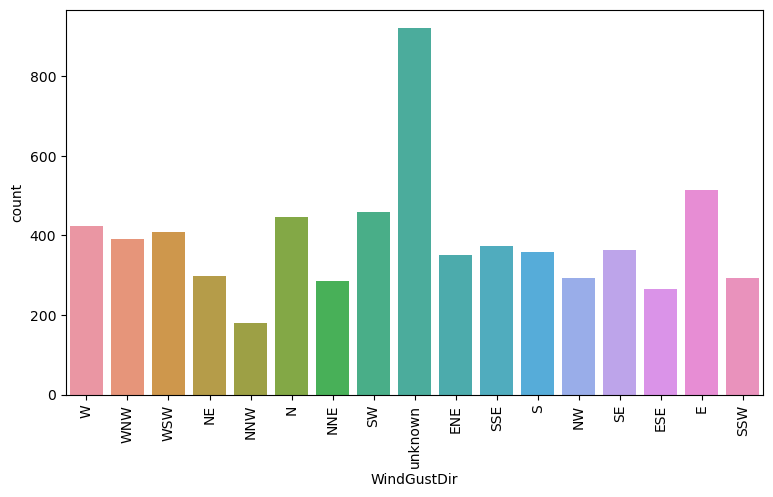

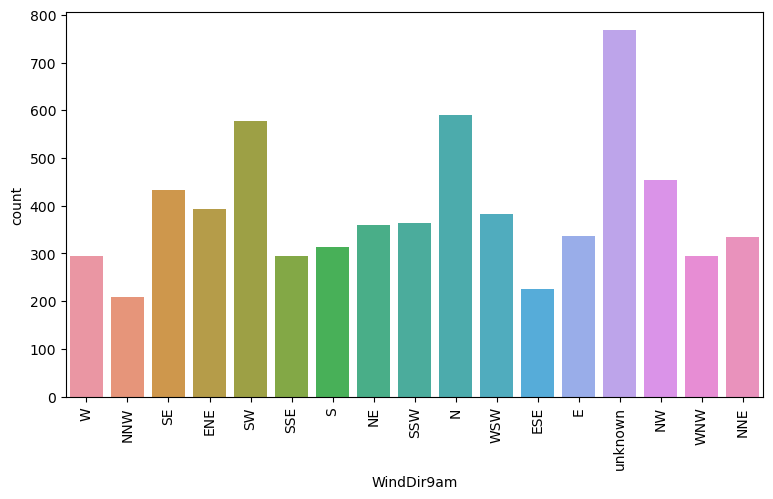

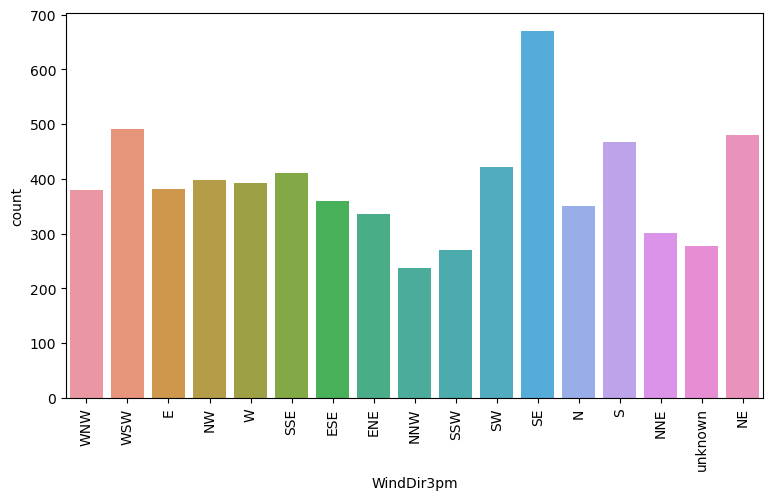

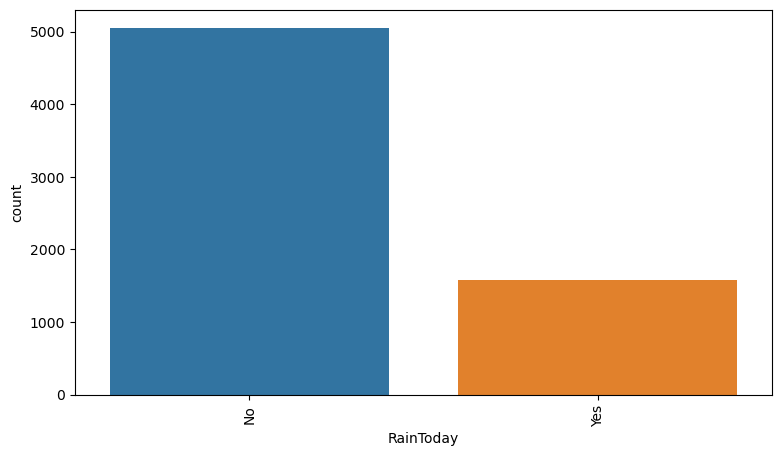

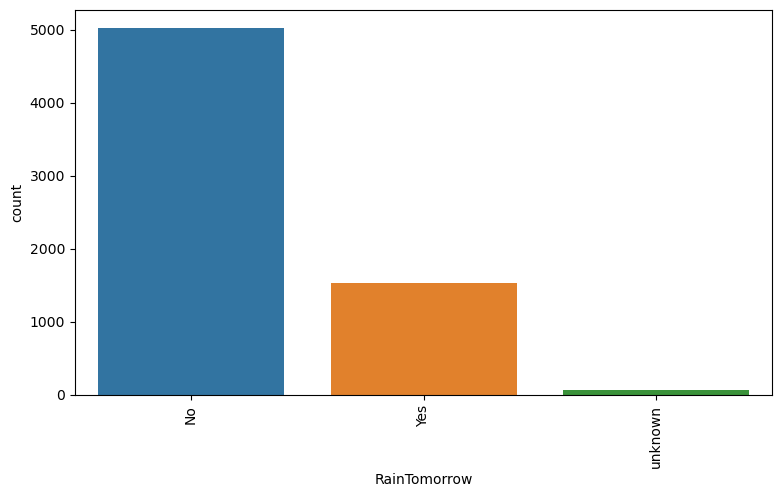

In [40]:
for i in data[cat_data]:
    plt.figure(figsize=(9,5))
    sns.countplot(x=data[cat_data][i])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

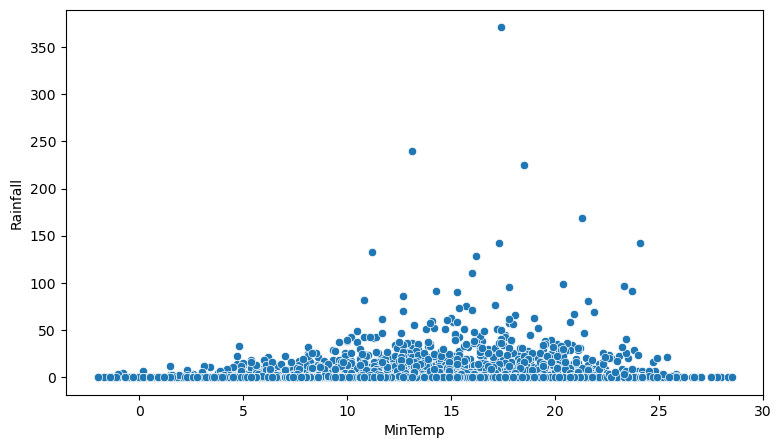

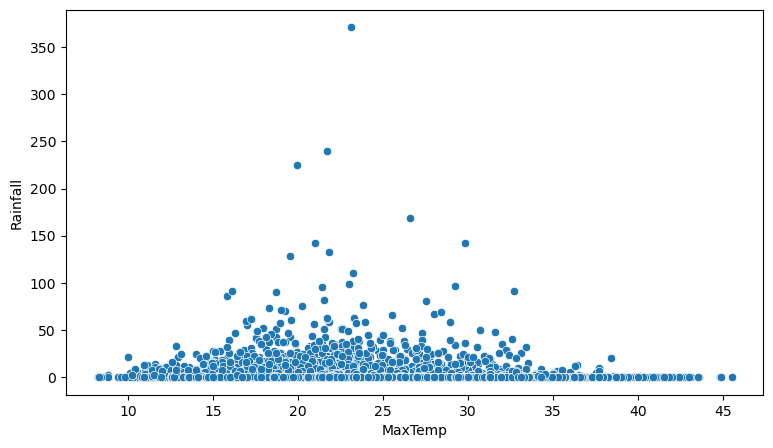

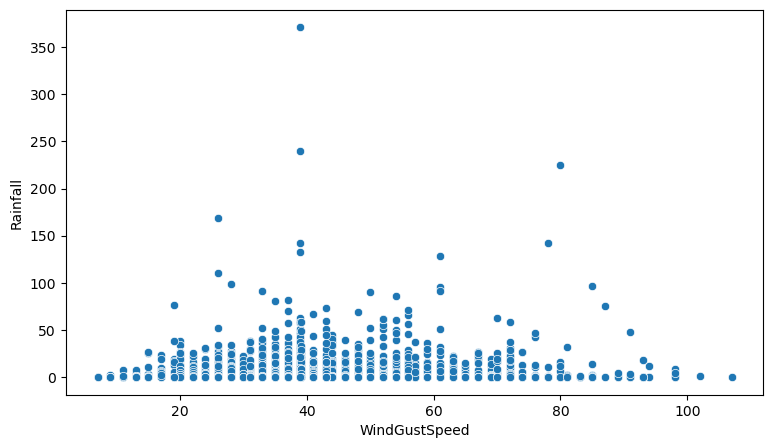

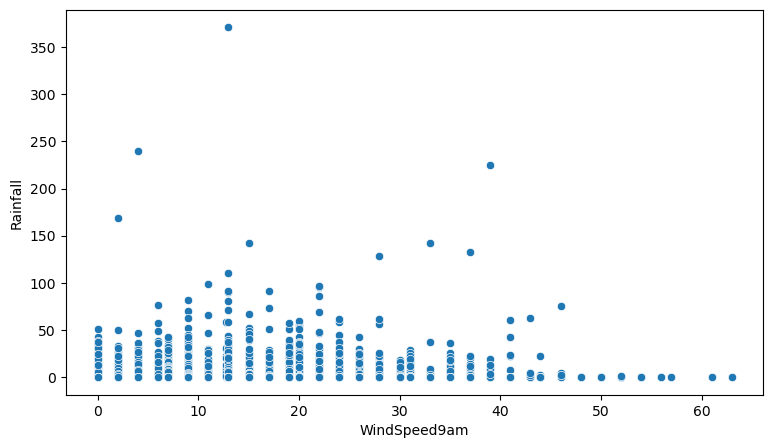

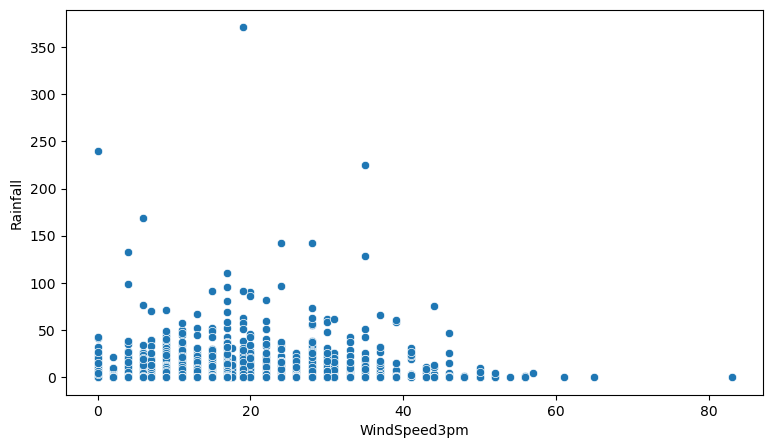

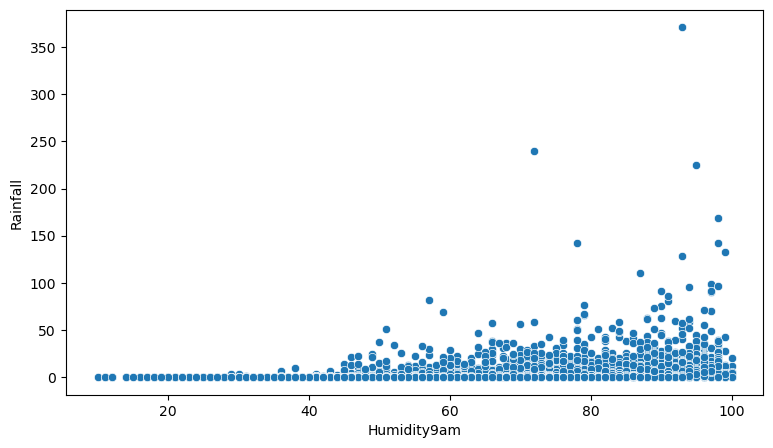

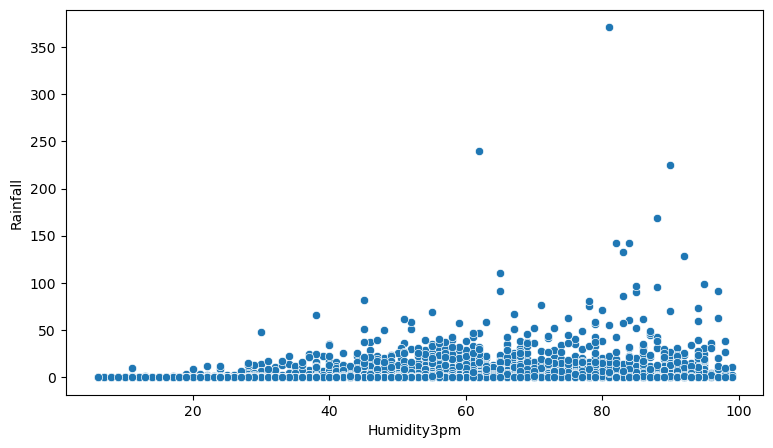

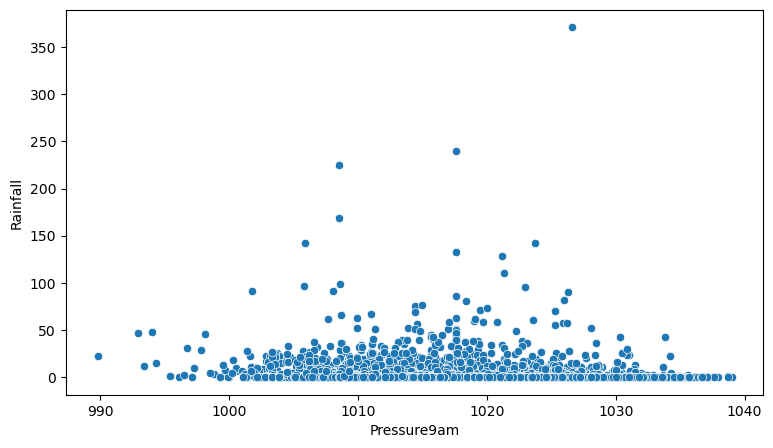

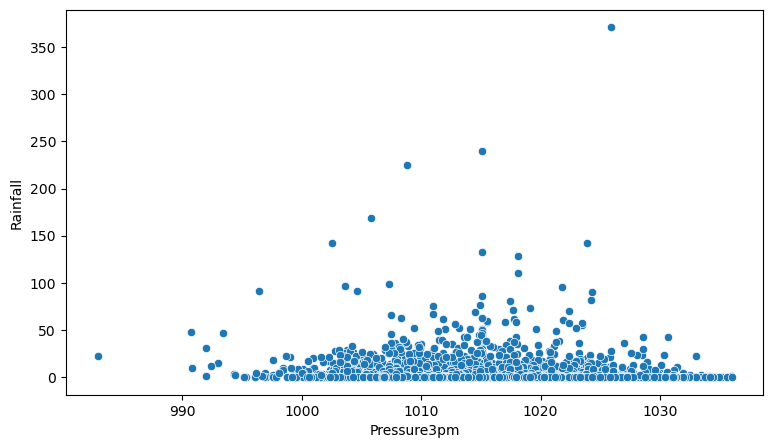

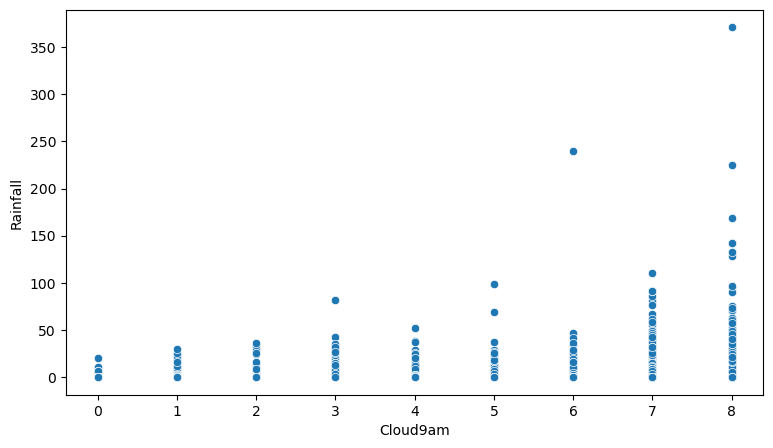

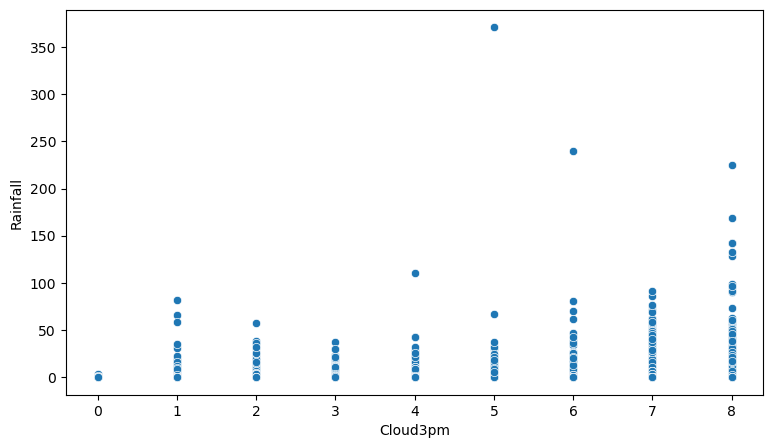

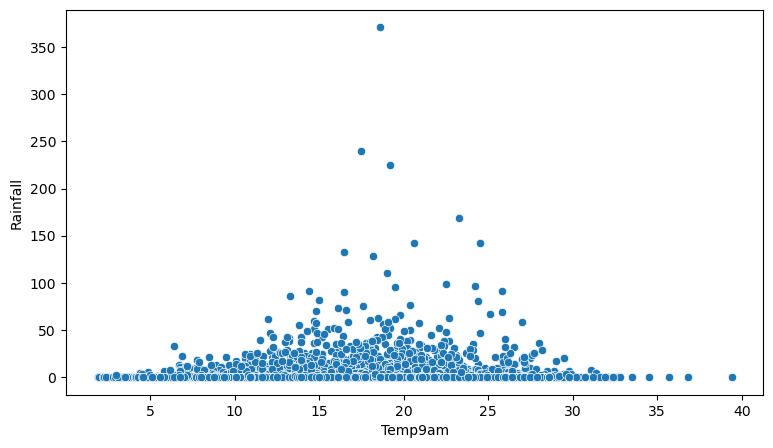

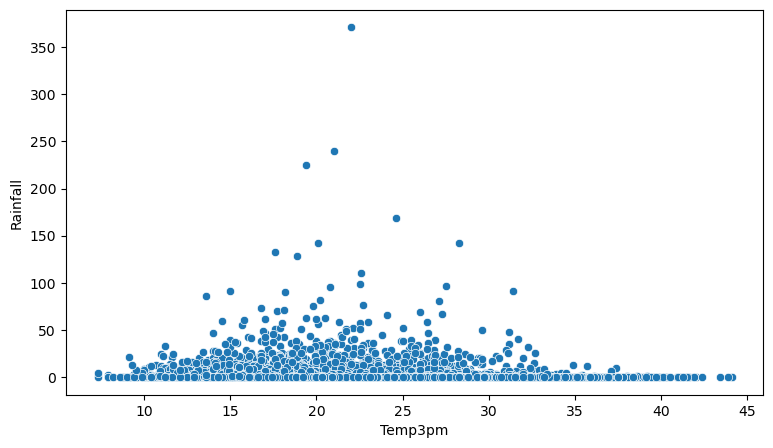

In [41]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    sns.scatterplot(x=data[cont_data][i],y = data['Rainfall'])
    plt.xlabel(i)
    plt.show()

1. as min temp increases rainfall increases upto some limit then it decreases

2. as max temp increases rainfall increases upto some limit then it decreases

3. lower the evaporation higher the rainfall

4. as wind gust speed increases rainfall increases upto some limit then it decreases

5. as humidity at 9am increases the rainfall increases

6. as humidity at 3pm increases the rainfall increases

7. as pressure at 9 am increases rainfall increases upto some limit then it decreases

8. as pressure at 3pm increases rainfall increases upto some limit then it decreases

9. higher the cloud count at 9am higher the rainfall

10. higher the cloud count at 3pm higher the rainfall

11. as min temp at 9 am increases rainfall increases upto some limit then decreases

12. as min temp at 3 pm increases rainfall increases upto some limit then decreases

13. high rainfall is recorded during 2009,2015 and 2016

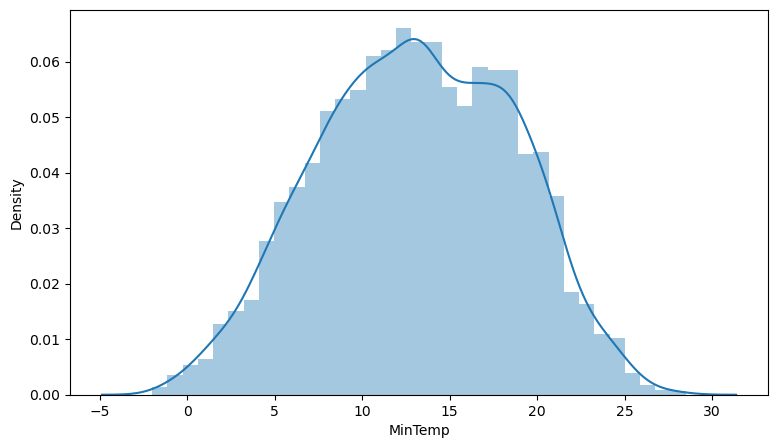

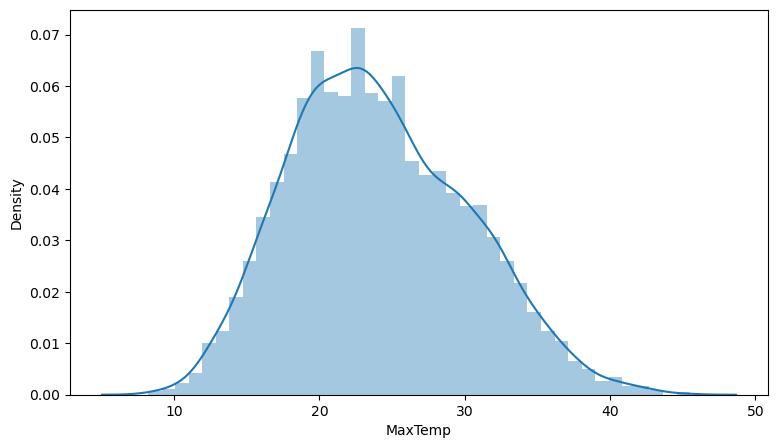

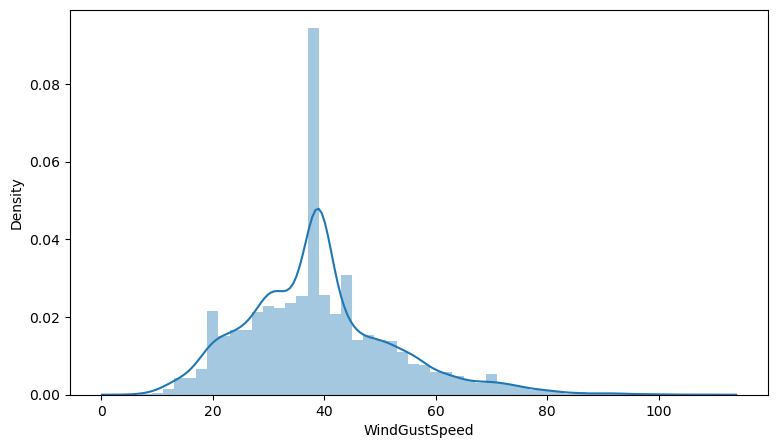

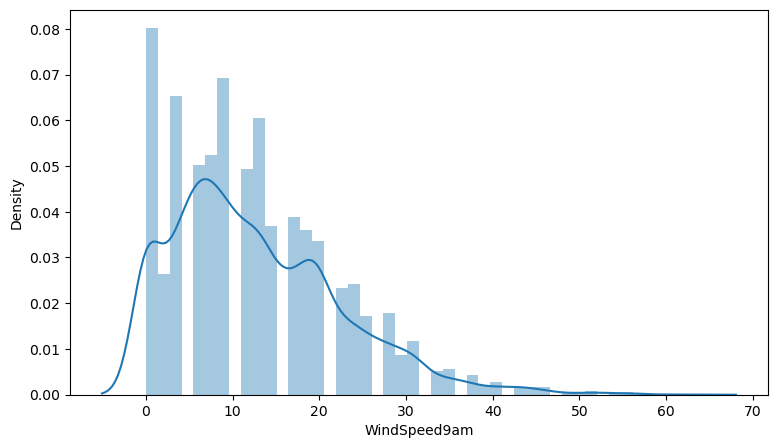

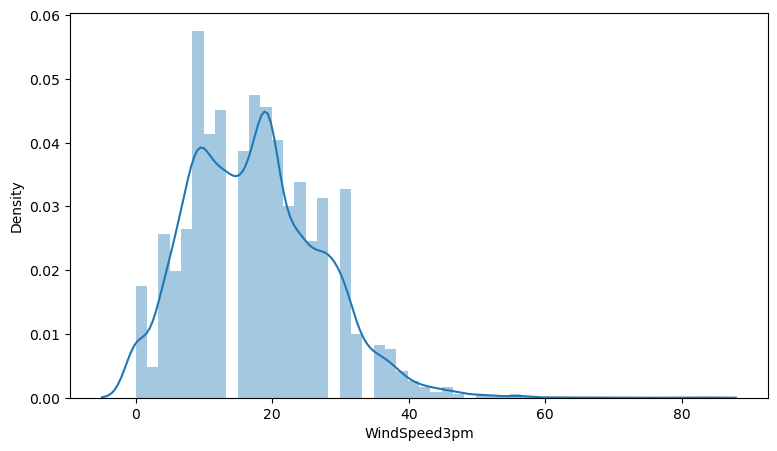

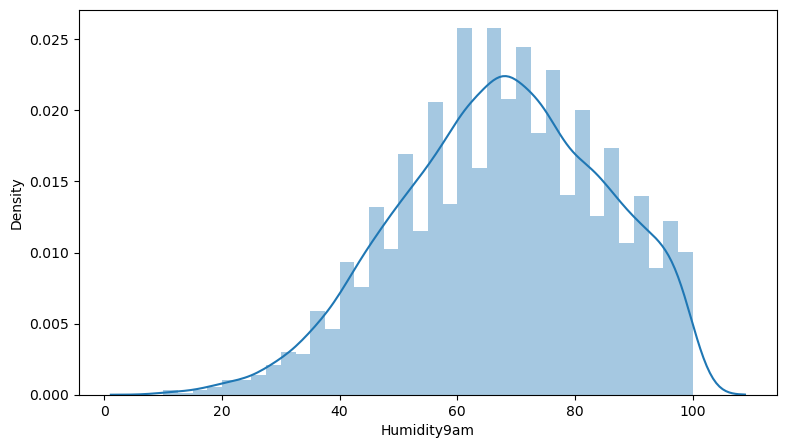

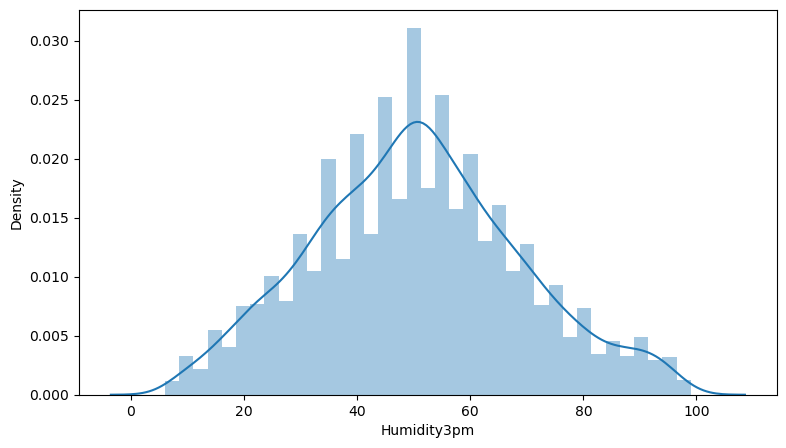

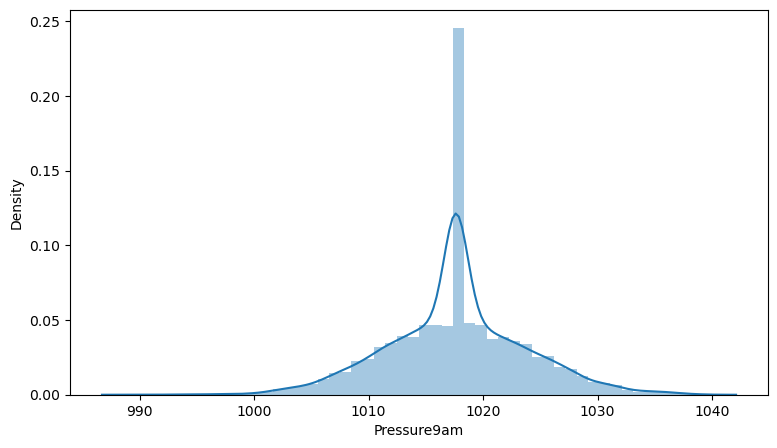

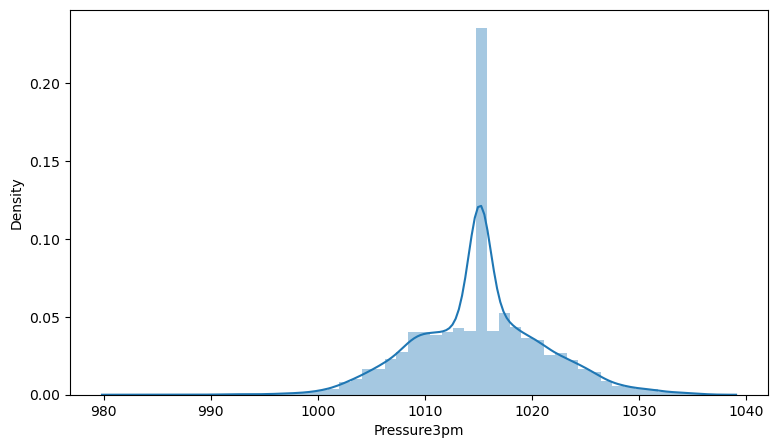

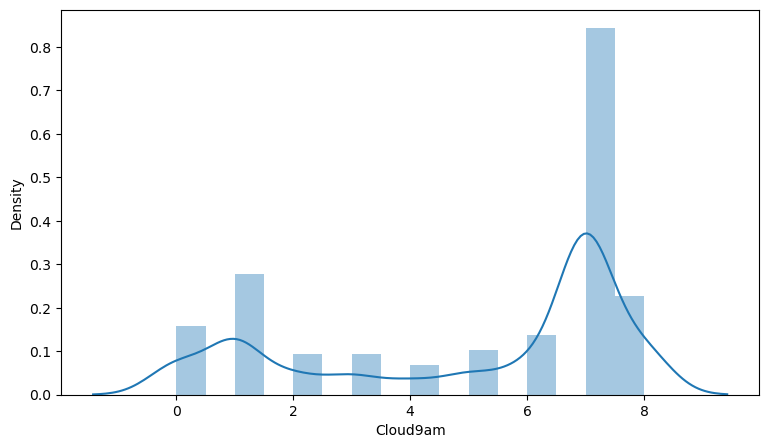

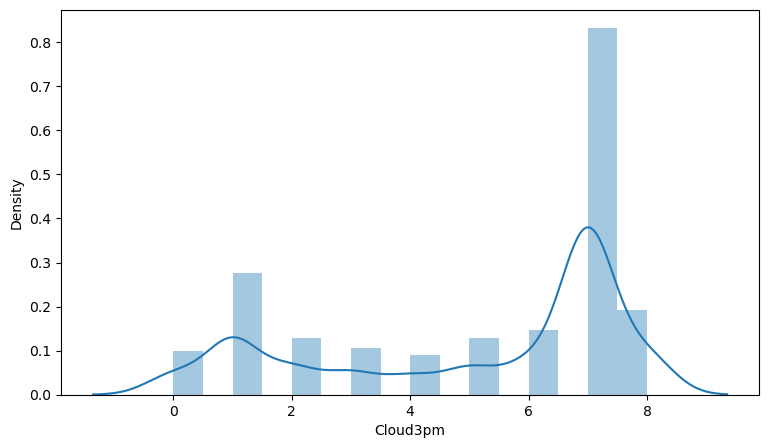

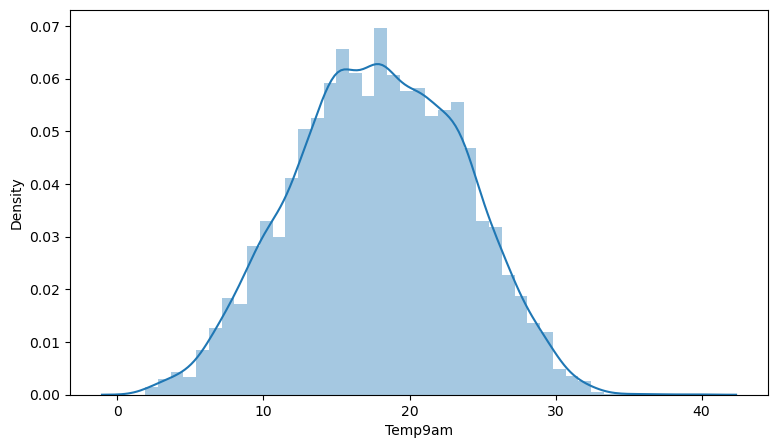

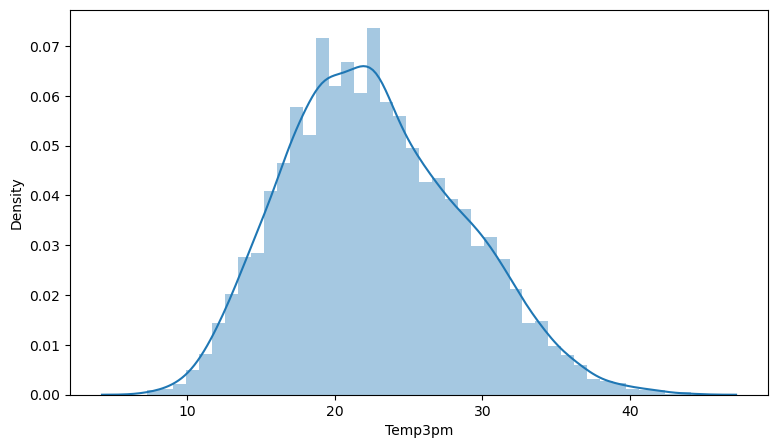

In [42]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    sns.distplot(data[cont_data][i])
    plt.xlabel(i)
    plt.show()

year,cloud 3pm,cloud 9am,is discrete data rest all are continous data.

none of the data is normally distributed and almost all have skewness

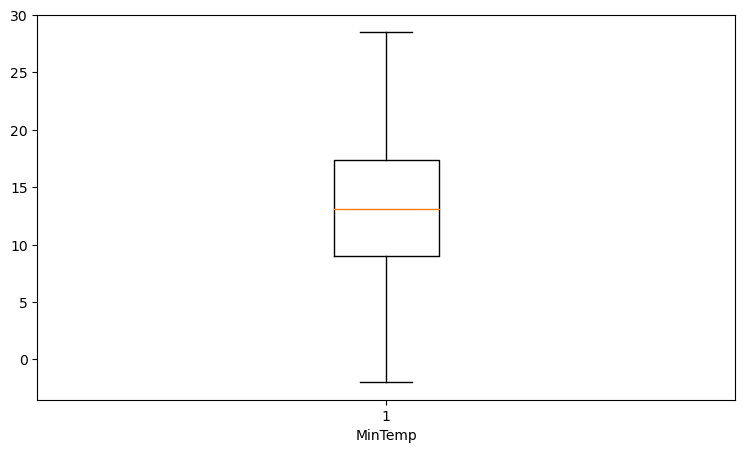

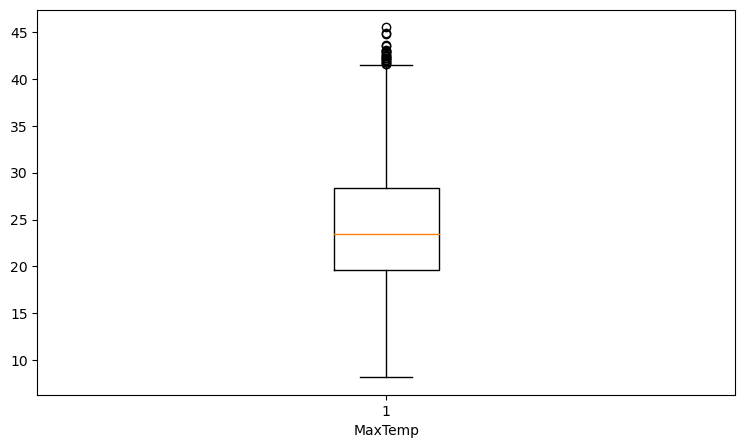

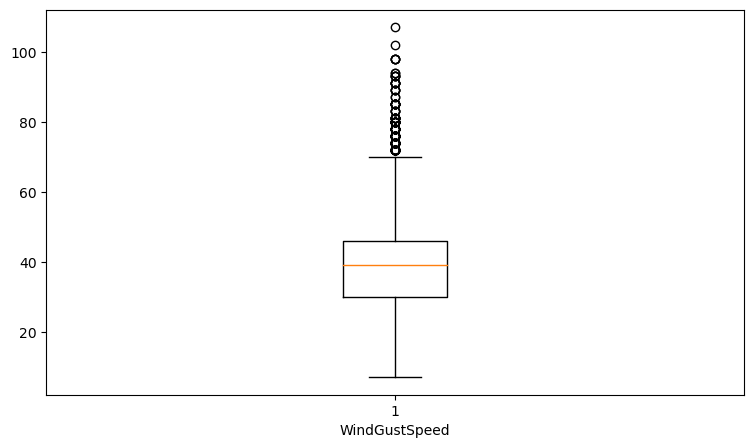

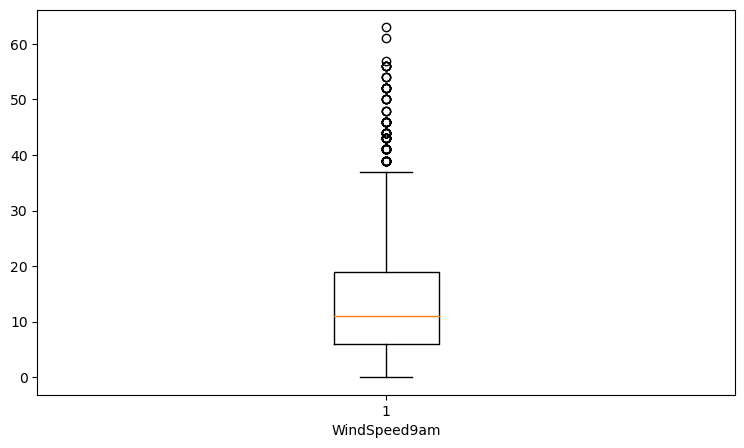

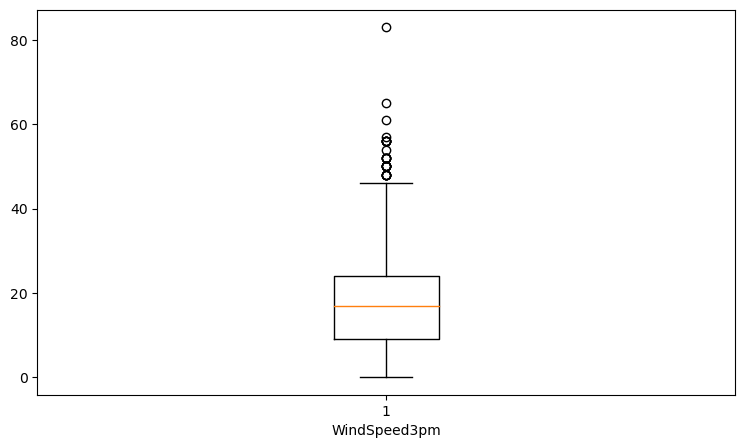

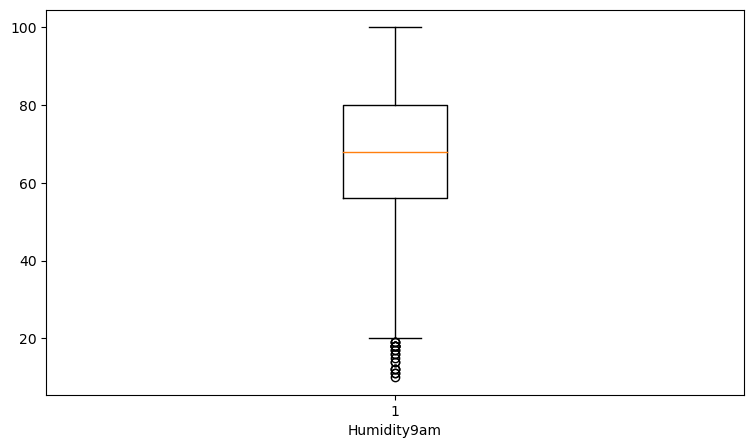

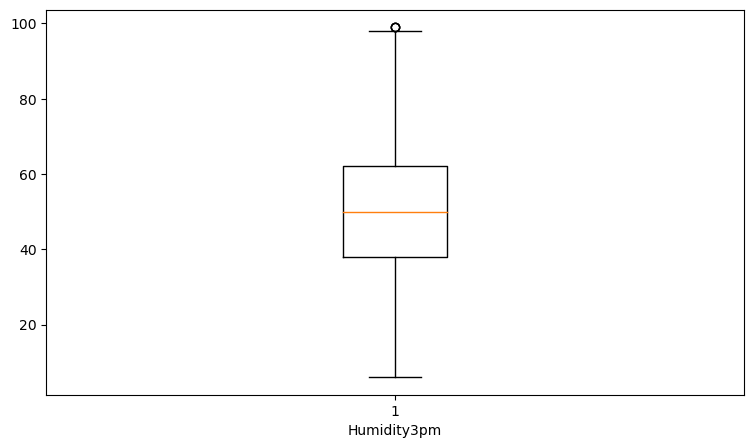

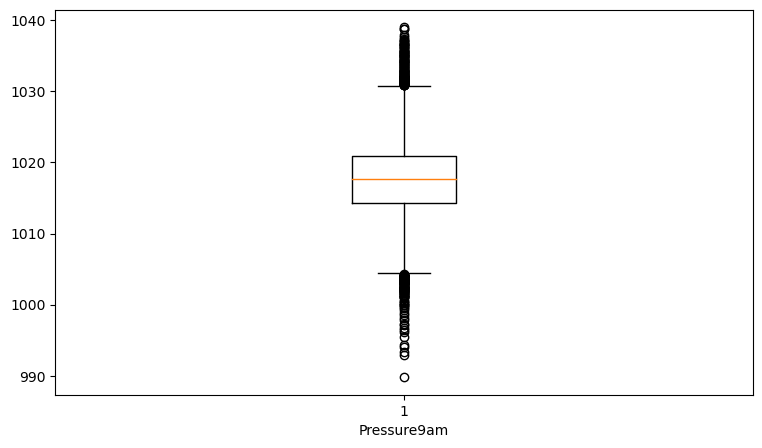

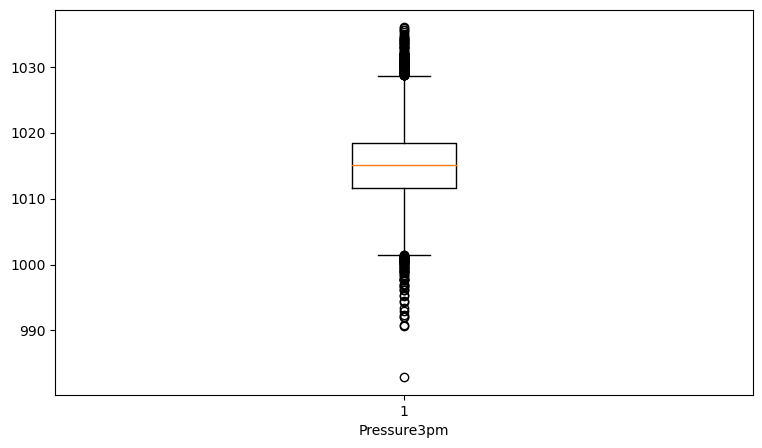

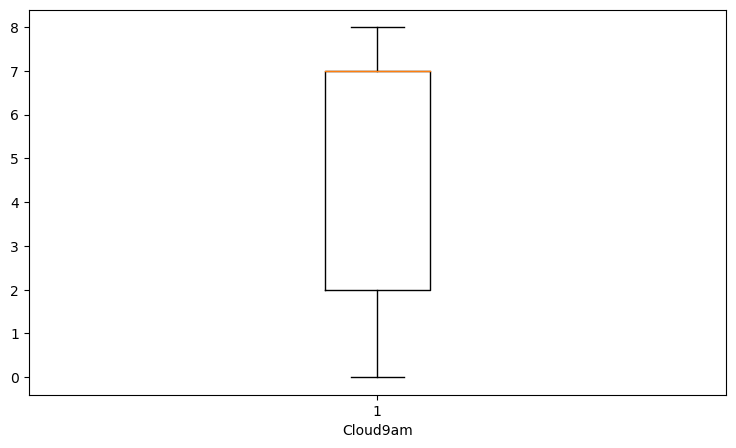

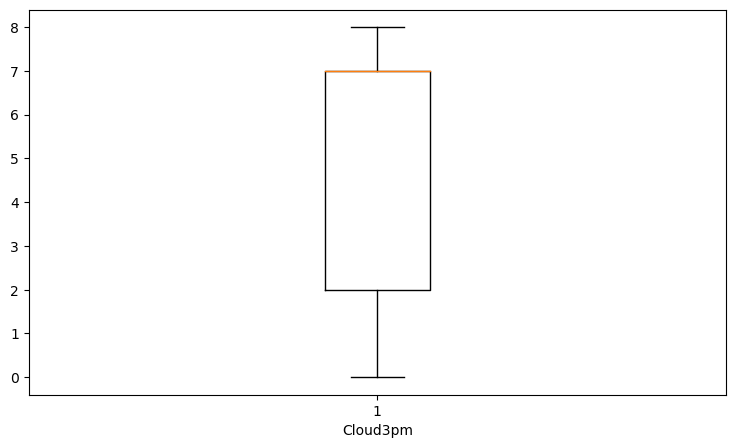

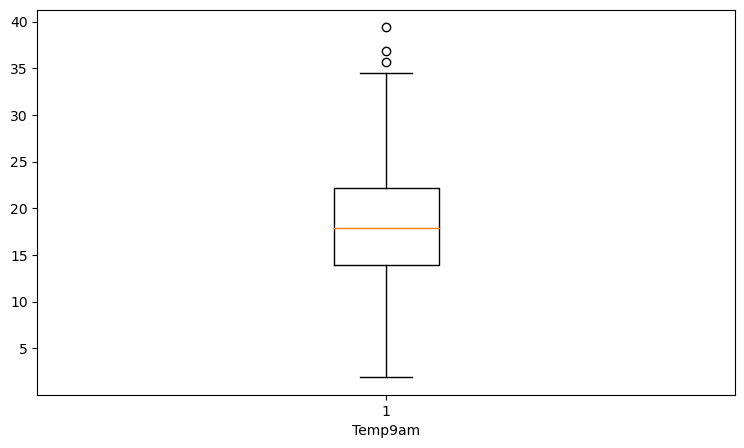

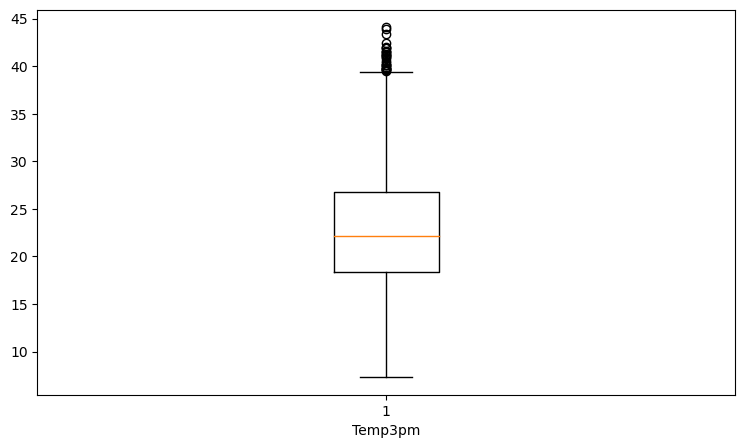

In [43]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    plt.boxplot(x=data[cont_data][i])
    plt.xlabel(i)
    plt.show()

maxtemp,evaporation,sunshine,winggustspeed,windspeed9am,sindspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm have outliers

# dealing with outliers

In [44]:
z =zscore(data[cont_data])

In [45]:
data = data[(z<3).all(axis=1)]

In [46]:
data.shape

(6436, 19)

In [47]:
data_loss = (6622-6436)/6622

In [48]:
data_loss

0.028088190878888555

# FEATURE SELECTION

In [49]:
data.shape

(6436, 19)

In [50]:
data.corr()['Rainfall'].sort_values()

Temp3pm         -0.096112
MaxTemp         -0.090993
Pressure9am     -0.066158
Pressure3pm     -0.025110
Temp9am         -0.006003
WindSpeed3pm     0.019785
WindSpeed9am     0.049445
WindGustSpeed    0.082841
MinTemp          0.093233
Cloud3pm         0.113367
Cloud9am         0.147948
Humidity9am      0.231015
Humidity3pm      0.245878
Rainfall         1.000000
Name: Rainfall, dtype: float64

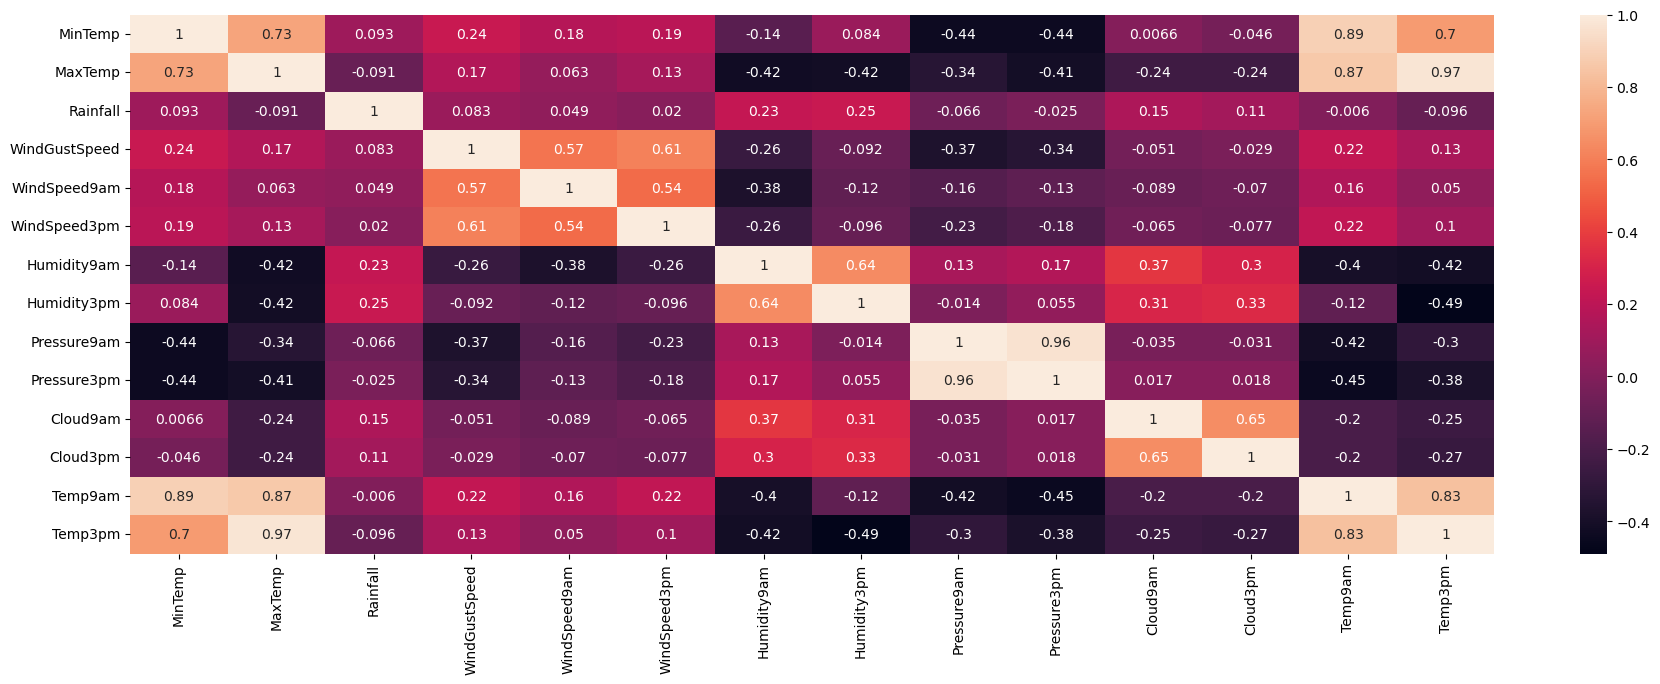

In [51]:
plt.figure(figsize=(22,7))

sns.heatmap(data.corr(),annot=True)

plt.show()

In [52]:
data.shape

(6436, 19)

In [53]:
len(cat_data)

5

In [54]:
len(cont_data)

13

In [55]:
X = data.drop(cat_data,axis=1)

y = data['Rainfall']

In [56]:
X.drop('Rainfall',axis=1,inplace=True)

selecting the top 20% features of all continous features

In [57]:
X

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Date,,,,,,,,,,,,,
2008-12-01,13.4,22.900000,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8
2008-12-02,7.4,25.100000,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3
2008-12-03,12.9,25.700000,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2
2008-12-04,9.2,28.000000,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5
2008-12-05,17.5,32.300000,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,2.8,23.400000,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4
2017-06-22,3.6,25.300000,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5
2017-06-23,5.4,26.900000,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1


In [58]:
mf = mutual_info_regression(X,y)

In [59]:
mf = pd.Series(mf)

mf.index = X.columns

mf.sort_values(ascending=False)

Humidity9am      0.131213
Humidity3pm      0.118119
Cloud3pm         0.063072
Temp3pm          0.059114
Cloud9am         0.052873
MaxTemp          0.040593
WindGustSpeed    0.037510
Pressure9am      0.026945
MinTemp          0.024840
WindSpeed3pm     0.021831
Temp9am          0.018142
Pressure3pm      0.010480
WindSpeed9am     0.005779
dtype: float64

In [60]:
tten = SelectPercentile(mutual_info_regression,percentile=20)

tten.fit(X,y)

X.columns[tten.get_support()]

Index(['Humidity9am', 'Humidity3pm', 'Cloud9am'], dtype='object')

In [61]:
cont_data

['MinTemp',
 'MaxTemp',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [62]:
cont_data.remove('MinTemp')

In [63]:
cont_data.remove('MaxTemp')

In [64]:
cont_data.remove('WindGustSpeed')

In [65]:
cont_data.remove('WindSpeed9am')

In [66]:
cont_data.remove('WindSpeed3pm')

In [67]:
cont_data.remove('Pressure3pm')

In [68]:
cont_data.remove('Pressure9am')

In [69]:
cont_data.remove('Cloud3pm')

In [70]:
cont_data.remove('Temp9am')

In [71]:
cont_data.remove('Temp3pm')

In [72]:
a = X.columns[tten.get_support()]

In [73]:
A = list(a)

In [74]:
A

['Humidity9am', 'Humidity3pm', 'Cloud9am']

In [75]:
A = A + cat_data

In [76]:
x = data[A]

In [77]:
x.head()

,Humidity9am,Humidity3pm,Cloud9am,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
Date,,,,,,,,
2008-12-01,71.0,22.0,8.0,W,W,WNW,No,No
2008-12-02,44.0,25.0,7.0,WNW,NNW,WSW,No,No
2008-12-03,38.0,30.0,7.0,WSW,W,WSW,No,No
2008-12-04,45.0,16.0,7.0,NE,SE,E,No,No
2008-12-05,82.0,33.0,7.0,W,ENE,NW,No,No


In [78]:
#dd = pd.get_dummies(x[cat_data])

In [79]:
#x = pd.concat([x,dd],axis=1)

In [80]:
#x.drop(cat_data,axis=1,inplace=True)

In [81]:
le = LabelEncoder()

In [82]:
x['WindGustDir'] = le.fit_transform(x['WindGustDir'])

In [83]:
x['WindDir9am'] = le.fit_transform(x['WindDir9am'])

In [84]:
x['WindDir3pm'] = le.fit_transform(x['WindDir3pm'])

In [85]:
x['RainToday'] = le.fit_transform(x['RainToday'])

In [86]:
x['RainTomorrow'] = le.fit_transform(x['RainTomorrow'])

In [87]:
x.head()

,Humidity9am,Humidity3pm,Cloud9am,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
Date,,,,,,,,
2008-12-01,71.0,22.0,8.0,13,13,14,0,0
2008-12-02,44.0,25.0,7.0,14,6,15,0,0
2008-12-03,38.0,30.0,7.0,15,13,15,0,0
2008-12-04,45.0,16.0,7.0,4,9,0,0,0
2008-12-05,82.0,33.0,7.0,13,1,7,0,0


In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=77)

In [89]:
pt = PowerTransformer()

In [90]:
x_train[cont_data] = pt.fit_transform(x_train[cont_data])

In [91]:
x_test[cont_data] = pt.transform(x_test[cont_data])

In [92]:
#ss = StandardScaler()

In [93]:
#x_train[cont_data] = ss.fit_transform(x_train[cont_data])

In [94]:
#x_test[cont_data] = ss.transform(x_test[cont_data])

In [95]:
#x_train.head()

# LR

In [96]:
lr = LinearRegression()

In [97]:
lr.fit(x_train,y_train)

LinearRegression()

In [98]:
pred1 = lr.predict(x_train)

In [99]:
pred2 = lr.predict(x_test)

In [100]:
print(f'Train Score: {r2_score(y_train,pred1)}')

Train Score: 0.2242921716483346


In [101]:
print(f'Test Score: {r2_score(y_test,pred2)}')

Test Score: 0.2574744621359898


In [102]:
a1 = r2_score(y_train,pred1)

In [103]:
a2 = r2_score(y_test,pred2)

In [104]:
cv = cross_val_score(lr,x,y)

a3 = cv.mean()

a3

0.2566849864451452

# LASSO

In [105]:
ls = Lasso()

In [106]:
ls.fit(x_train,y_train)

Lasso()

In [107]:
pred3 = ls.predict(x_train)

In [108]:
pred4 = ls.predict(x_test)

In [109]:
print(f'Train Score: {r2_score(y_train,pred3)}')

Train Score: 0.17184981842073055


In [110]:
print(f'Test Score: {r2_score(y_test,pred4)}')

Test Score: 0.19728356155707172


In [111]:
a4 = r2_score(y_train,pred3)

In [112]:
a5 = r2_score(y_test,pred4)

In [113]:
cv = cross_val_score(ls,x,y)

a6 = cv.mean()

a6

0.1863051692314518

# RIDGE

In [114]:
ri = Ridge()

In [115]:
ri.fit(x_train,y_train)

Ridge()

In [116]:
pred5 = ri.predict(x_train)

In [117]:
pred6 = ri.predict(x_test)

In [118]:
print(f'Train Score: {r2_score(y_train,pred5)}')

Train Score: 0.2242919179964995


In [119]:
print(f'Test Score: {r2_score(y_test,pred6)}')

Test Score: 0.25750307335849865


In [120]:
a7 = r2_score(y_train,pred5)

In [121]:
a8= r2_score(y_test,pred6)

In [122]:
cv = cross_val_score(ri,x,y)

a9 = cv.mean()

a9

0.2566982118721405

# KNN

In [123]:
knn = KNeighborsRegressor()

In [124]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [125]:
pred7 = knn.predict(x_train)

In [126]:
pred8 = knn.predict(x_test)

In [127]:
a10 = r2_score(y_train,pred7)

In [128]:
a11 = r2_score(y_test,pred8)

In [129]:
print(f'Train Score: {r2_score(y_train,pred7)}')

Train Score: 0.3567514438868512


In [130]:
print(f'Test Score: {r2_score(y_test,pred8)}')

Test Score: 0.018097198583871488


In [131]:
cv = cross_val_score(knn,x,y)

a12 = cv.mean()

a12

-0.05621495566981072

# DT

In [132]:
dt = DecisionTreeRegressor()

In [133]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [134]:
pred9 = dt.predict(x_train)

In [135]:
pred10 = dt.predict(x_test)

In [136]:
print(f'Train Score: {r2_score(y_train,pred9)}')

Train Score: 0.9996993966382622


In [137]:
print(f'Test Score: {r2_score(y_test,pred10)}')

Test Score: -0.2636910765059681


In [138]:
a13 = r2_score(y_train,pred9)

In [139]:
a14 = r2_score(y_test,pred10)

In [140]:
cv = cross_val_score(dt,x,y)

a15 = cv.mean()

a15

-1.2378446119004045

# RF

In [141]:
rf = RandomForestRegressor()

In [142]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [143]:
pred11 = rf.predict(x_train)

In [144]:
pred12 = rf.predict(x_test)

In [145]:
print(f'Train Score: {r2_score(y_train,pred11)}')

Train Score: 0.8825504918249045


In [146]:
print(f'Test Score: {r2_score(y_test,pred12)}')

Test Score: 0.2790980517132945


In [147]:
a16 = r2_score(y_train,pred11)

In [148]:
a17 = r2_score(y_test,pred12)

In [149]:
cv = cross_val_score(rf,x,y)

a18 = cv.mean()

a18

-0.41083449319477383

# ADA

In [150]:
ada = AdaBoostRegressor()

In [151]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [152]:
pred13 = ada.predict(x_train)

In [153]:
pred14 = ada.predict(x_test)

In [154]:
print(f'Train Score: {r2_score(y_train,pred13)}')

Train Score: 0.06441783427342052


In [155]:
print(f'Test Score: {r2_score(y_test,pred14)}')

Test Score: -0.28384327830277445


In [156]:
a19 = r2_score(y_train,pred13)

In [157]:
a20 = r2_score(y_test,pred14)

In [158]:
cv = cross_val_score(ada,x,y)

a21 = cv.mean()

a21

-0.4987035655543637

# GBDT

In [159]:
gb = GradientBoostingRegressor()

In [160]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [161]:
pred15 = gb.predict(x_train)

In [162]:
pred16 = gb.predict(x_test)

In [163]:
print(f'Train Score: {r2_score(y_train,pred15)}')

Train Score: 0.3959916267323529


In [164]:
print(f'Test Score: {r2_score(y_test,pred16)}')

Test Score: 0.3132426604155474


In [165]:
a22 = r2_score(y_train,pred15)

In [166]:
a23 = r2_score(y_test,pred16)

In [167]:
cv = cross_val_score(gb,x,y)

a24 = cv.mean()

a24

-0.21190633587982996

# XGBOOST

In [168]:
xg = XGBRegressor()

In [169]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [170]:
pred17 = xg.predict(x_train)

In [171]:
pred18 = xg.predict(x_test)

In [172]:
print(f'Train Score: {r2_score(y_train,pred17)}')

Train Score: 0.9687473819126693


In [173]:
print(f'Test Score: {r2_score(y_test,pred18)}')

Test Score: 0.10142046278190475


In [174]:
a25 = r2_score(y_train,pred17)

In [175]:
a26 = r2_score(y_test,pred18)

In [176]:
cv = cross_val_score(xg,x,y)

a27 = cv.mean()

a27

-1.4960664807739283

# SVM

In [177]:
svm = SVR()

In [178]:
svm.fit(x_train,y_train)

SVR()

In [179]:
pred19 = svm.predict(x_train)

In [180]:
pred20 = svm.predict(x_test)

In [181]:
print(f'Train Score: {r2_score(y_train,pred19)}')

Train Score: 0.070776005295207


In [182]:
print(f'Test Score: {r2_score(y_test,pred20)}')

Test Score: 0.08634463323452324


In [183]:
a28 = r2_score(y_train,pred17)

In [184]:
a29 = r2_score(y_test,pred18)

In [185]:
cv = cross_val_score(svm,x,y)

a30 = cv.mean()

a30

0.01112573717168921

In [186]:
model = ['LR','LASSO','RIDGE','KNN','DT','RF','ADA','GBDT','XGBOOST','SVM']

In [187]:
train = []
test = []
cv = []

In [188]:
train.append(a1)
test.append(a2)
cv.append(a3)

train.append(a4)
test.append(a5)
cv.append(a6)

train.append(a7)
test.append(a8)
cv.append(a9)

train.append(a10)
test.append(a11)
cv.append(a12)

train.append(a13)
test.append(a14)
cv.append(a15)

train.append(a16)
test.append(a17)
cv.append(a18)

train.append(a19)
test.append(a20)
cv.append(a21)

train.append(a22)
test.append(a23)
cv.append(a24)

train.append(a25)
test.append(a26)
cv.append(a27)

train.append(a28)
test.append(a29)
cv.append(a30)

In [189]:
result = pd.DataFrame({'MODELS':model,"TRAIN SCORE":train,'TEST RESULT':test,'CV SCORE':cv})

In [190]:
result

,MODELS,TRAIN SCORE,TEST RESULT,CV SCORE
0,LR,0.224292,0.257474,0.256685
1,LASSO,0.171850,0.197284,0.186305
2,RIDGE,0.224292,0.257503,0.256698
3,KNN,0.356751,0.018097,-0.056215
4,DT,0.999699,-0.263691,-1.237845
5,RF,0.882550,0.279098,-0.410834
6,ADA,0.064418,-0.283843,-0.498704
7,GBDT,0.395992,0.313243,-0.211906
8,XGBOOST,0.968747,0.101420,-1.496066
9,SVM,0.968747,0.101420,0.011126


GBDT is the best we are having from the given data

In [191]:
gb = GradientBoostingRegressor()

In [192]:
para = {'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
       'learning_rate':[0.001,0.01,0.1,1,10],
       'n_estimators':[100,200,300],
       'criterion':['friedman_mse', 'squared_error'],
       'min_samples_split':[2,3,4],
       'min_samples_leaf':[1,2],
       'max_depth':[2,3,4],
       'max_features':['auto', 'sqrt', 'log2']}

In [193]:
rs = RandomizedSearchCV(gb,para,n_jobs=-1)

In [194]:
rs.fit(x_train,y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.001, 0.01, 0.1, 1,
                                                          10],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [2, 3, 4],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [100, 200, 300]})

In [195]:
rs.best_params_

{'n_estimators': 100,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 3,
 'loss': 'huber',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

In [196]:
trainpred = rs.best_estimator_.predict(x_train)

In [197]:
testpred = rs.best_estimator_.predict(x_test)

In [198]:
print(f'Train Score: {r2_score(y_train,trainpred)}')

Train Score: 0.2128334766312412


In [199]:
print(f'Train Score: {r2_score(y_test,testpred)}')

Train Score: 0.21869644245676034


In [200]:
conclusion = pd.DataFrame({'Actual':y_test,"Predicted":testpred})

In [201]:
conclusion

,Actual,Predicted
Date,,
2014-11-25,8.4,4.468344
2010-10-16,9.6,2.280881
2010-10-09,0.0,0.051599
2015-09-11,0.0,0.022853
2011-11-15,0.0,0.014319
...,...,...
2012-03-16,0.0,0.015604
2009-06-08,0.0,0.055078
2014-02-14,0.0,0.027863


In [202]:
pickle.dump(rs.best_estimator_,open('rain_reg.pkl','wb'))

# 2. Classification

In [203]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [204]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [205]:
data.set_index('Date',inplace=True)

In [206]:
data.shape

(8425, 22)

# DATA PRE PROCESSING

In [207]:
data.drop_duplicates(inplace=True)

In [208]:
data.shape

(6752, 22)

we have 6752 row's of data which has 22 feature's and 1 label

In [209]:
data.isna().sum()

Location            0
MinTemp            60
MaxTemp            47
Rainfall          130
Evaporation      2911
Sunshine         3226
WindGustDir       932
WindGustSpeed     932
WindDir9am        784
WindDir3pm        284
WindSpeed9am       53
WindSpeed3pm       90
Humidity9am        44
Humidity3pm        86
Pressure9am      1298
Pressure3pm      1301
Cloud9am         1856
Cloud3pm         1892
Temp9am            41
Temp3pm            82
RainToday         130
RainTomorrow      130
dtype: int64

 we have missing values

Evaporation,sunshine have too many null values so we can drop them

In [210]:
data.drop(['Evaporation','Sunshine'],axis=1,inplace=True)

also dropping location column

In [211]:
data.drop('Location',axis=1,inplace=True)

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6752 entries, 2008-12-01 to 2017-06-25
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        6692 non-null   float64
 1   MaxTemp        6705 non-null   float64
 2   Rainfall       6622 non-null   float64
 3   WindGustDir    5820 non-null   object 
 4   WindGustSpeed  5820 non-null   float64
 5   WindDir9am     5968 non-null   object 
 6   WindDir3pm     6468 non-null   object 
 7   WindSpeed9am   6699 non-null   float64
 8   WindSpeed3pm   6662 non-null   float64
 9   Humidity9am    6708 non-null   float64
 10  Humidity3pm    6666 non-null   float64
 11  Pressure9am    5454 non-null   float64
 12  Pressure3pm    5451 non-null   float64
 13  Cloud9am       4896 non-null   float64
 14  Cloud3pm       4860 non-null   float64
 15  Temp9am        6711 non-null   float64
 16  Temp3pm        6670 non-null   float64
 17  RainToday      6622 non-null   object 
 18

In [213]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,6692.0,13.109145,5.569574,-2.0,9.0,13.2,17.5,28.5
MaxTemp,6705.0,24.098345,6.156128,8.2,19.5,23.5,28.4,45.5
Rainfall,6622.0,2.780988,10.592907,0.0,0.0,0.0,0.8,371.0
WindGustSpeed,5820.0,38.977663,14.418577,7.0,30.0,37.0,48.0,107.0
WindSpeed9am,6699.0,12.782206,9.833499,0.0,6.0,11.0,19.0,63.0
WindSpeed3pm,6662.0,17.571150,9.620043,0.0,9.0,17.0,24.0,83.0
Humidity9am,6708.0,67.506559,17.251733,10.0,56.0,68.0,81.0,100.0
Humidity3pm,6666.0,50.467147,18.631086,6.0,38.0,50.0,63.0,99.0
Pressure9am,5454.0,1017.626311,6.712043,989.8,1013.1,1017.6,1022.2,1039.0
Pressure3pm,5451.0,1015.119923,6.646755,982.9,1010.3,1015.1,1019.6,1036.0


HANDLING MISSING VALUES

In [214]:
data.isna().sum()

MinTemp            60
MaxTemp            47
Rainfall          130
WindGustDir       932
WindGustSpeed     932
WindDir9am        784
WindDir3pm        284
WindSpeed9am       53
WindSpeed3pm       90
Humidity9am        44
Humidity3pm        86
Pressure9am      1298
Pressure3pm      1301
Cloud9am         1856
Cloud3pm         1892
Temp9am            41
Temp3pm            82
RainToday         130
RainTomorrow      130
dtype: int64

In [215]:
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)

In [216]:
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)

In [217]:
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)

In [218]:
data['WindGustDir'].fillna('unknown',inplace=True)

In [219]:
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)

In [220]:
data['WindDir9am'].fillna('unknown',inplace=True)

In [221]:
data['WindDir3pm'].fillna('unknown',inplace=True)

In [222]:
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)

In [223]:
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)

In [224]:
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)

In [225]:
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)

In [226]:
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)

In [227]:
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)

In [228]:
data['Cloud9am'].fillna(data['Cloud9am'].mode()[0],inplace=True)

In [229]:
data['Cloud3pm'].fillna(data['Cloud3pm'].mode()[0],inplace=True)

In [230]:
data['RainToday'].fillna('unknown',inplace=True)

In [231]:
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)

In [232]:
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)

In [233]:
data.dropna(subset=['RainTomorrow'],inplace=True)

In [234]:
data.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6622 entries, 2008-12-01 to 2017-06-24
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        6622 non-null   float64
 1   MaxTemp        6622 non-null   float64
 2   Rainfall       6622 non-null   float64
 3   WindGustDir    6622 non-null   object 
 4   WindGustSpeed  6622 non-null   float64
 5   WindDir9am     6622 non-null   object 
 6   WindDir3pm     6622 non-null   object 
 7   WindSpeed9am   6622 non-null   float64
 8   WindSpeed3pm   6622 non-null   float64
 9   Humidity9am    6622 non-null   float64
 10  Humidity3pm    6622 non-null   float64
 11  Pressure9am    6622 non-null   float64
 12  Pressure3pm    6622 non-null   float64
 13  Cloud9am       6622 non-null   float64
 14  Cloud3pm       6622 non-null   float64
 15  Temp9am        6622 non-null   float64
 16  Temp3pm        6622 non-null   float64
 17  RainToday      6622 non-null   object 
 18

In [236]:
cat_data = data.select_dtypes('object').columns.tolist()

In [237]:
cont_data = data.select_dtypes('float64').columns.tolist()

In [238]:
cat_data

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [239]:
cont_data

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [240]:
cat_data.remove('RainTomorrow')

In [241]:
le = LabelEncoder()

In [242]:
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])

# dealing with outliers

In [243]:
z =zscore(data[cont_data])

In [244]:
data = data[(z<3).all(axis=1)]

In [245]:
data.shape

(6352, 19)

In [246]:
data_loss = (6752-6352)/6752

In [247]:
data_loss

0.05924170616113744

# FEATURE SELECTION

In [248]:
X = data.drop(cat_data,axis=1)

y = data['RainTomorrow']

In [249]:
X.drop('RainTomorrow',axis=1,inplace=True)

we have total 18 features, 14 continous and 4 categorical

selecting 12 best features 4 categorical and 8 continous

In [250]:
mi = mutual_info_classif(X,y)

In [251]:
mi = pd.Series(mi)

mi.index = X.columns

mi.sort_values(ascending=False)

Humidity3pm      0.130447
Rainfall         0.057057
Cloud3pm         0.056366
Humidity9am      0.048166
WindGustSpeed    0.030202
Cloud9am         0.030015
Temp3pm          0.018434
MaxTemp          0.013768
WindSpeed3pm     0.009906
Pressure9am      0.009462
Pressure3pm      0.007370
WindSpeed9am     0.006304
Temp9am          0.000764
MinTemp          0.000000
dtype: float64

In [252]:
bestf = SelectKBest(mutual_info_classif,k=8)

bestf.fit(X,y)

a = X.columns[bestf.get_support()]

In [253]:
a

Index(['MinTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Cloud9am', 'Cloud3pm', 'Temp3pm'],
      dtype='object')

In [254]:
A = list(a)

In [255]:
a = A+cat_data

In [256]:
x = data[a]

In [257]:
x.shape

(6352, 12)

In [258]:
x.head()

,MinTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,WindGustDir,WindDir9am,WindDir3pm,RainToday
Date,,,,,,,,,,,,
2008-12-01,13.4,0.6,71.0,22.0,1007.7,8.0,7.0,21.8,W,W,WNW,No
2008-12-02,7.4,0.0,44.0,25.0,1010.6,7.0,7.0,24.3,WNW,NNW,WSW,No
2008-12-03,12.9,0.0,38.0,30.0,1007.6,7.0,2.0,23.2,WSW,W,WSW,No
2008-12-04,9.2,0.0,45.0,16.0,1017.6,7.0,7.0,26.5,NE,SE,E,No
2008-12-05,17.5,1.0,82.0,33.0,1010.8,7.0,8.0,29.7,W,ENE,NW,No


In [259]:
#ss = StandardScaler()

In [260]:
#x[A] = ss.fit_transform(x[A])

In [261]:
pt = PowerTransformer()

In [262]:
x[A] = pt.fit_transform(x[A])

In [263]:
x.head()

,MinTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,WindGustDir,WindDir9am,WindDir3pm,RainToday
Date,,,,,,,,,,,,
2008-12-01,0.077775,0.729632,0.173983,-1.604744,-1.722465,1.170294,0.763949,-0.091508,W,W,WNW,No
2008-12-02,-1.006615,-0.663630,-1.357420,-1.416892,-1.226685,0.726431,0.763949,0.328084,WNW,NNW,WSW,No
2008-12-03,-0.011742,-0.663630,-1.666493,-1.112920,-1.739537,0.726431,-1.201622,0.146197,WSW,W,WSW,No
2008-12-04,-0.678691,-0.663630,-1.304665,-1.996012,-0.024530,0.726431,0.763949,0.680131,NE,SE,E,No
2008-12-05,0.807329,1.091082,0.853146,-0.935220,-1.192445,0.726431,1.236156,1.167465,W,ENE,NW,No


In [264]:
x['WindGustDir'] = le.fit_transform(x['WindGustDir'])

In [265]:
x['WindDir9am'] = le.fit_transform(x['WindDir9am'])

In [266]:
x['WindDir3pm'] = le.fit_transform(x['WindDir3pm'])

In [267]:
x['RainToday'] = le.fit_transform(x['RainToday'])

In [268]:
x.head()

,MinTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,WindGustDir,WindDir9am,WindDir3pm,RainToday
Date,,,,,,,,,,,,
2008-12-01,0.077775,0.729632,0.173983,-1.604744,-1.722465,1.170294,0.763949,-0.091508,13,13,14,0
2008-12-02,-1.006615,-0.663630,-1.357420,-1.416892,-1.226685,0.726431,0.763949,0.328084,14,6,15,0
2008-12-03,-0.011742,-0.663630,-1.666493,-1.112920,-1.739537,0.726431,-1.201622,0.146197,15,13,15,0
2008-12-04,-0.678691,-0.663630,-1.304665,-1.996012,-0.024530,0.726431,0.763949,0.680131,4,9,0,0
2008-12-05,0.807329,1.091082,0.853146,-0.935220,-1.192445,0.726431,1.236156,1.167465,13,1,7,0


In [269]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=90)

In [270]:
y.value_counts()

0    4900
1    1452
Name: RainTomorrow, dtype: int64

data set is not balanced

In [271]:
sm = SMOTE()

In [272]:
x_train,y_train = sm.fit_resample(x_train,y_train)

In [273]:
y_train.value_counts()

0    3915
1    3915
Name: RainTomorrow, dtype: int64

# LR

In [274]:
lr = LogisticRegression()

In [275]:
lr.fit(x_train,y_train)

LogisticRegression()

In [276]:
pred1 = lr.predict(x_train)

In [277]:
pred2 = lr.predict(x_test)

In [278]:
print(f'Train Score: {accuracy_score(y_train,pred1)}')

Train Score: 0.7855683269476373


In [279]:
print(f'Test Score: {accuracy_score(y_test,pred2)}')

Test Score: 0.7726199842643587


In [280]:
a1 = accuracy_score(y_train,pred1)

In [281]:
a2 = accuracy_score(y_test,pred2)

In [282]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.91      0.79      0.84       985
           1       0.50      0.73      0.59       286

    accuracy                           0.77      1271
   macro avg       0.70      0.76      0.72      1271
weighted avg       0.82      0.77      0.79      1271



In [283]:
print(confusion_matrix(y_test,pred2))

[[774 211]
 [ 78 208]]


In [284]:
cv = cross_val_score(lr,x,y)

a3 = cv.mean()

a3

0.8244621074608002

# KNN

In [285]:
knn = KNeighborsClassifier()

In [286]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [287]:
pred3 = knn.predict(x_train)

In [288]:
pred4 = knn.predict(x_test)

In [289]:
print(f'Train Score: {accuracy_score(y_train,pred3)}')

Train Score: 0.8899106002554279


In [290]:
print(f'Test Score: {accuracy_score(y_test,pred4)}')

Test Score: 0.7309205350118018


In [291]:
a4 = accuracy_score(y_train,pred3)

In [292]:
a5 = accuracy_score(y_test,pred4)

In [293]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       985
           1       0.44      0.70      0.54       286

    accuracy                           0.73      1271
   macro avg       0.67      0.72      0.67      1271
weighted avg       0.79      0.73      0.75      1271



In [294]:
print(confusion_matrix(y_test,pred4))

[[729 256]
 [ 86 200]]


In [295]:
cv = cross_val_score(knn,x,y)

a6 = cv.mean()

a6

0.782905394103471

# DT

In [296]:
dt = DecisionTreeClassifier()

In [297]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [298]:
pred5 = dt.predict(x_train)

In [299]:
pred6 = dt.predict(x_test)

In [300]:
print(f'Train Score: {accuracy_score(y_train,pred5)}')

Train Score: 0.9998722860791827


In [301]:
print(f'Test Score: {accuracy_score(y_test,pred6)}')

Test Score: 0.7458693941778127


In [302]:
a7 = accuracy_score(y_train,pred5)

In [303]:
a8 = accuracy_score(y_test,pred6)

In [304]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       985
           1       0.45      0.56      0.50       286

    accuracy                           0.75      1271
   macro avg       0.66      0.68      0.66      1271
weighted avg       0.77      0.75      0.76      1271



In [305]:
print(confusion_matrix(y_test,pred6))

[[787 198]
 [125 161]]


In [306]:
cv = cross_val_score(dt,x,y)

a9 = cv.mean()

a9

0.744650811252842

# RF

In [307]:
rf = RandomForestClassifier()

In [308]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [309]:
pred7 = rf.predict(x_train)

In [310]:
pred8 = rf.predict(x_test)

In [311]:
print(f'Train Score: {accuracy_score(y_train,pred7)}')

Train Score: 0.9998722860791827


In [312]:
print(f'Test Score: {accuracy_score(y_test,pred8)}')

Test Score: 0.8143194335169158


In [313]:
a10 = accuracy_score(y_train,pred7)

In [314]:
a11 = accuracy_score(y_test,pred8)

In [315]:
print(classification_report(y_test,pred8))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       985
           1       0.58      0.62      0.60       286

    accuracy                           0.81      1271
   macro avg       0.73      0.74      0.74      1271
weighted avg       0.82      0.81      0.82      1271



In [316]:
print(confusion_matrix(y_test,pred8))

[[859 126]
 [110 176]]


In [317]:
cv = cross_val_score(rf,x,y)

a12 = cv.mean()

a12

0.8178523947291797

# ada

In [318]:
ada = AdaBoostClassifier()

In [319]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [320]:
pred9 = ada.predict(x_train)

In [321]:
pred10 = ada.predict(x_test)

In [322]:
print(f'Train Score: {accuracy_score(y_train,pred9)}')

Train Score: 0.8234993614303959


In [323]:
print(f'Test Score: {accuracy_score(y_test,pred10)}')

Test Score: 0.7820613690007868


In [324]:
a13 = accuracy_score(y_train,pred9)

In [325]:
a14 = accuracy_score(y_test,pred10)

In [326]:
print(classification_report(y_test,pred10))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       985
           1       0.51      0.67      0.58       286

    accuracy                           0.78      1271
   macro avg       0.70      0.74      0.72      1271
weighted avg       0.81      0.78      0.79      1271



In [327]:
print(confusion_matrix(y_test,pred10))

[[803 182]
 [ 95 191]]


In [328]:
cv = cross_val_score(ada,x,y)

a15 = cv.mean()

a15

0.8181668597483537

# GBDT

In [329]:
gb = GradientBoostingClassifier()

In [330]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [331]:
pred11 = gb.predict(x_train)

In [332]:
pred12 = gb.predict(x_test)

In [333]:
print(f'Train Score: {accuracy_score(y_train,pred11)}')

Train Score: 0.8624521072796935


In [334]:
print(f'Test Score: {accuracy_score(y_test,pred12)}')

Test Score: 0.8017309205350118


In [335]:
a16 = accuracy_score(y_train,pred11)

In [336]:
a17 = accuracy_score(y_test,pred12)

In [337]:
print(classification_report(y_test,pred12))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       985
           1       0.55      0.61      0.58       286

    accuracy                           0.80      1271
   macro avg       0.72      0.73      0.73      1271
weighted avg       0.81      0.80      0.81      1271



In [338]:
print(confusion_matrix(y_test,pred12))

[[844 141]
 [111 175]]


In [339]:
cv = cross_val_score(gb,x,y)

a18 = cv.mean()

a18

0.8183245878686879

# XGBOOST

In [340]:
xg = XGBClassifier()

In [341]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [342]:
pred13 = xg.predict(x_train)

In [343]:
pred14 = xg.predict(x_test)

In [344]:
print(f'Train Score: {accuracy_score(y_train,pred13)}')

Train Score: 0.9872286079182631


In [345]:
print(f'Test Score: {accuracy_score(y_test,pred14)}')

Test Score: 0.8316286388670339


In [346]:
a19 = accuracy_score(y_train,pred13)

In [347]:
a20 = accuracy_score(y_test,pred14)

In [348]:
print(classification_report(y_test,pred14))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       985
           1       0.64      0.58      0.61       286

    accuracy                           0.83      1271
   macro avg       0.76      0.74      0.75      1271
weighted avg       0.83      0.83      0.83      1271



In [349]:
print(confusion_matrix(y_test,pred14))

[[890  95]
 [119 167]]


In [350]:
cv = cross_val_score(xg,x,y)

a21 = cv.mean()

a21

0.7932963690317625

# SVM

In [351]:
svm = SVC()

In [352]:
svm.fit(x_train,y_train)

SVC()

In [353]:
pred15 = svm.predict(x_train)

In [354]:
pred16 = svm.predict(x_test)

In [355]:
print(f'Train Score: {accuracy_score(y_train,pred15)}')

Train Score: 0.7982120051085568


In [356]:
print(f'Test Score: {accuracy_score(y_test,pred16)}')

Test Score: 0.7828481510621558


In [357]:
a22 = accuracy_score(y_train,pred15)

In [358]:
a23 = accuracy_score(y_test,pred16)

In [359]:
print(classification_report(y_test,pred16))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       985
           1       0.51      0.75      0.61       286

    accuracy                           0.78      1271
   macro avg       0.71      0.77      0.73      1271
weighted avg       0.83      0.78      0.80      1271



In [360]:
print(confusion_matrix(y_test,pred16))

[[780 205]
 [ 71 215]]


In [361]:
fpr,tpr,threshold = roc_curve(y_test,pred16)

In [362]:
roc_auc_score(y_test,pred16)

0.771813212168542

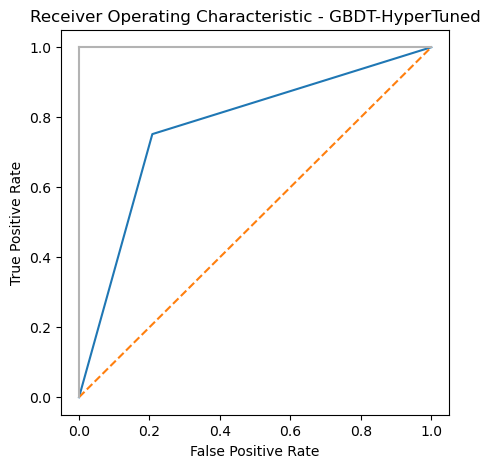

In [363]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - GBDT-HyperTuned')
plt.plot(fpr,tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [364]:
cv = cross_val_score(svm,x,y)

a24 = cv.mean()

a24

0.8219446526697931

In [365]:
model = ['LR','KNN','DT','RF','ADA','GBDT','XGBOOST','SVM']

In [366]:
train = []
test = []
cv = []

In [367]:
train.append(a1)
test.append(a2)
cv.append(a3)

train.append(a4)
test.append(a5)
cv.append(a6)

train.append(a7)
test.append(a8)
cv.append(a9)

train.append(a10)
test.append(a11)
cv.append(a12)

train.append(a13)
test.append(a14)
cv.append(a15)

train.append(a16)
test.append(a17)
cv.append(a18)

train.append(a19)
test.append(a20)
cv.append(a21)

train.append(a22)
test.append(a23)
cv.append(a24)

In [368]:
result = pd.DataFrame({"MODEL":model,"TRAIN":train,"TEST":test,'CV':cv})

In [369]:
result

,MODEL,TRAIN,TEST,CV
0,LR,0.785568,0.772620,0.824462
1,KNN,0.889911,0.730921,0.782905
2,DT,0.999872,0.745869,0.744651
3,RF,0.999872,0.814319,0.817852
4,ADA,0.823499,0.782061,0.818167
5,GBDT,0.862452,0.801731,0.818325
6,XGBOOST,0.987229,0.831629,0.793296
7,SVM,0.798212,0.782848,0.821945


svm is the best model and i tried with 11 and 10 features and the results are as below

In [370]:
result11 = pd.read_csv('rain_11.csv')

In [371]:
result11.drop('Unnamed: 0',axis=1,inplace=True)

In [372]:
result11

,MODEL,TRAIN,TEST,CV
0,LR,0.788506,0.786782,0.831075
1,KNN,0.900255,0.731707,0.790460
2,DT,0.999872,0.752950,0.758503
3,RF,0.999872,0.819827,0.831547
4,ADA,0.835760,0.807238,0.829816
5,GBDT,0.874202,0.820614,0.832020
6,XGBOOST,0.985313,0.841857,0.816749
7,SVM,0.798978,0.786782,0.829501


In [373]:
result10 = pd.read_csv('rain_10.csv')

In [374]:
result10.drop('Unnamed: 0',axis=1,inplace=True)

In [375]:
result10

,MODEL,TRAIN,TEST,CV
0,LR,0.765773,0.768686,0.824305
1,KNN,0.893231,0.707317,0.782905
2,DT,0.999872,0.765539,0.742605
3,RF,0.999617,0.810386,0.817535
4,ADA,0.823244,0.774194,0.815648
5,GBDT,0.863346,0.803304,0.818796
6,XGBOOST,0.978927,0.818253,0.802265
7,SVM,0.780204,0.771046,0.816750


we get the best result when we use 12 features

# HYPER PARAMETER TUNING

In [376]:
svm = SVC()

In [377]:
para = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [378]:
rs = RandomizedSearchCV(svm,para,n_jobs=-1)

In [379]:
rs.fit(x_train,y_train)

RandomizedSearchCV(estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']})

In [380]:
rs.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 100}

In [381]:
rs.best_estimator_.fit(x_train,y_train)

SVC(C=100, gamma=1)

In [382]:
trainpred = rs.best_estimator_.predict(x_train)

In [383]:
testpred = rs.best_estimator_.predict(x_test)

In [384]:
print(f'Train Score: {accuracy_score(y_train,trainpred)}')

Train Score: 0.9998722860791827


In [385]:
print(f'Train Score: {accuracy_score(y_test,testpred)}')

Train Score: 0.7757671125098348


In [386]:
conclusion = pd.DataFrame({'Actual':y_test,"Predicted":testpred})

In [387]:
conclusion

,Actual,Predicted
Date,,
2012-07-04,0,0
2015-02-09,1,0
2013-06-20,0,0
2012-03-25,0,0
2012-01-24,0,0
...,...,...
2011-12-06,1,0
2015-12-18,0,0
2017-01-13,0,0


In [388]:
fpr,tpr,threshold = roc_curve(y_test,testpred)

In [389]:
cv = cross_val_score(rs.best_estimator_,x,y)

cv_mean = cv.mean()

cv_mean

0.7710957334109789

In [390]:
roc_auc_score(y_test,testpred)

0.5426892904050266

In [391]:
print(classification_report(y_test,testpred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       985
           1       0.51      0.12      0.19       286

    accuracy                           0.78      1271
   macro avg       0.65      0.54      0.53      1271
weighted avg       0.73      0.78      0.72      1271



In [392]:
print(confusion_matrix(y_test,testpred))

[[952  33]
 [252  34]]


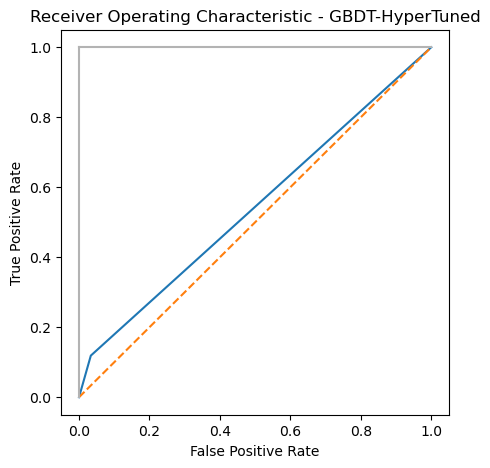

In [393]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - GBDT-HyperTuned')
plt.plot(fpr,tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

after hyperparameter tuning we are not getting desired result so we can use the original model

In [394]:
pickle.dump(svm,open('rain_class.pkl','wb'))